In [1]:
import numpy as np
from matplotlib.pyplot import subplots, show, close
import BrennSpec as bs

In [2]:
data = np.loadtxt("baseline_subtracted.txt")

In [3]:
absorption = bs.AbsorptionSpectrum(data)

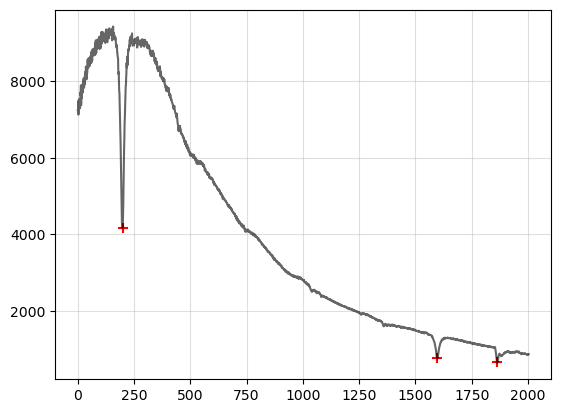

In [4]:
fig, ax = subplots()
x, y = absorption.get_peaks()
ax.scatter(x, y, color='r', marker='+', s=50)
ax.plot(absorption.array, alpha=0.6, color='k')
ax.grid(alpha=0.4)
show()
close(fig)